In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Import and clean data

In [2]:
# Import data of type string from the train and test dataset 
data_train = np.loadtxt('training.txt', delimiter=' ', dtype=np.str, usecols=(0,1,3,4,6,7), skiprows=1)
data_test = np.loadtxt('testing.txt', delimiter=' ', dtype=np.str, usecols=(0,1,3,4,6,7), skiprows=1)

In [3]:
# Import numeric data from the train and test dataset
data_train_num = np.loadtxt('training.txt', delimiter=' ', dtype=np.int, usecols=(2,5), skiprows=1)
data_test_num = np.loadtxt('testing.txt', delimiter=' ', dtype=np.int, usecols=(2,5), skiprows=1)

In [4]:
# Split x and y values
x_train = data_train[:,1:]
y_train = data_train[:,0]
x_test = data_test[:,1:]
y_test = data_test[:,0]

In [5]:
# Normalize numeric values
scaler = MinMaxScaler()
data_train_num = scaler.fit_transform(data_train_num)
data_test_num = scaler.fit_transform(data_test_num)

In [6]:
# one hot encoding of categories
def one_hot_enc(X):
    ohe = OneHotEncoder()
    ohe.fit(X)
    return ohe.transform(X).toarray()

In [7]:
# encode y values to binary
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [8]:
X_train_enc = one_hot_enc(x_train)
X_test_enc = one_hot_enc(x_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [9]:
print(X_train_enc.shape)
print(data_train_num.shape)

(702, 11)
(702, 2)


In [10]:
# Stack the categorical and numerical data
X_train_enc = np.column_stack((X_train_enc,data_train_num))
X_test_enc =  np.column_stack((X_test_enc,data_test_num))

In [11]:
print(X_train_enc.shape)
print(X_test_enc.shape)

(702, 13)
(298, 13)


# NN model approach

In [12]:
model = Sequential([
    Dense(32, kernel_initializer='glorot_normal'),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


##  Model training and model performance  evaluation

In [14]:
history = model.fit(X_train_enc, y_train_enc,
          batch_size=128,
          epochs=90,
          validation_data=(X_test_enc, y_test_enc), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 702 samples, validate on 298 samples
Epoch 1/90
702/702 [==============================] - 0s 615us/step - loss: 0.7975 - acc: 0.4288 - val_loss: 0.7412 - val_acc: 0.4866
Epoch 2/90
702/702 [==============================] - 0s 23us/step - loss: 0.7445 - acc: 0.4615 - val_loss: 0.7010 - val_acc: 0.5268
Epoch 3/90
702/702 [==============================] - 0s 34us/step - loss: 0.6976 - acc: 0.5598 - val_loss: 0.6687 - val_acc: 0.6443
Epoch 4/90
702/702 [==============================] - 0s 66us/step - loss: 0.6586 - acc: 0.6752 - val_loss: 0.6436 - val_acc: 0.6544
Epoch 5/90
702/702 [==============================] - 0s 49us/step - loss: 0.6241 - acc: 0.6909 - val_loss: 0.6254 - val_acc: 0.6644
Epoch 6/90
702/702 [==============================] - 0s 31us/step - loss: 0.6012 - acc: 0.6937 - val_loss: 0.6120 - val_acc: 0.6678
Epoch 7/90
702/702 [==============================] - 0s 33us/step - loss: 0.5812 - acc: 0.7037 - val_loss:

Epoch 60/90
702/702 [==============================] - 0s 22us/step - loss: 0.4655 - acc: 0.7707 - val_loss: 0.5930 - val_acc: 0.7248
Epoch 61/90
702/702 [==============================] - 0s 23us/step - loss: 0.4678 - acc: 0.7849 - val_loss: 0.5923 - val_acc: 0.7181
Epoch 62/90
702/702 [==============================] - 0s 17us/step - loss: 0.4672 - acc: 0.7764 - val_loss: 0.5933 - val_acc: 0.7215
Epoch 63/90
702/702 [==============================] - 0s 17us/step - loss: 0.4673 - acc: 0.7707 - val_loss: 0.5936 - val_acc: 0.7215
Epoch 64/90
702/702 [==============================] - 0s 19us/step - loss: 0.4641 - acc: 0.7735 - val_loss: 0.5936 - val_acc: 0.7215
Epoch 65/90
702/702 [==============================] - 0s 20us/step - loss: 0.4645 - acc: 0.7764 - val_loss: 0.5935 - val_acc: 0.7215
Epoch 66/90
702/702 [==============================] - 0s 19us/step - loss: 0.4667 - acc: 0.7806 - val_loss: 0.5934 - val_acc: 0.7181
Epoch 67/90
702/702 [==============================] - 0s 21us

### Model accuracy

In [15]:
print(history.history['val_acc'][-1]*100)

73.15436265612608


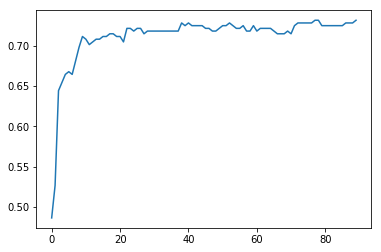

In [16]:
plt.plot(history.history['val_acc'])

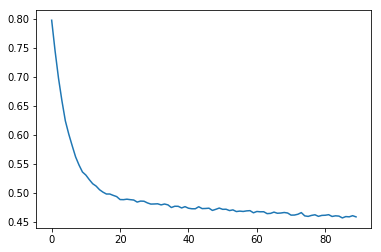

In [17]:
plt.plot(history.history['loss'])

# kNN Approach

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
neigh = KNeighborsClassifier(n_neighbors=15, weights='distance')

In [20]:
neigh.fit(X_train_enc, y_train_enc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [21]:
y_pred = neigh.predict(X_test_enc)

### Calculate model validation accuracy

In [22]:
np.where(y_pred == y_test_enc)[0].shape[0]/y_test_enc.shape[0]

0.7080536912751678